In [133]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy import stats

In [134]:
df = pd.read_csv("C:/Zhivopis/netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [136]:
df.describe(include = "all")

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


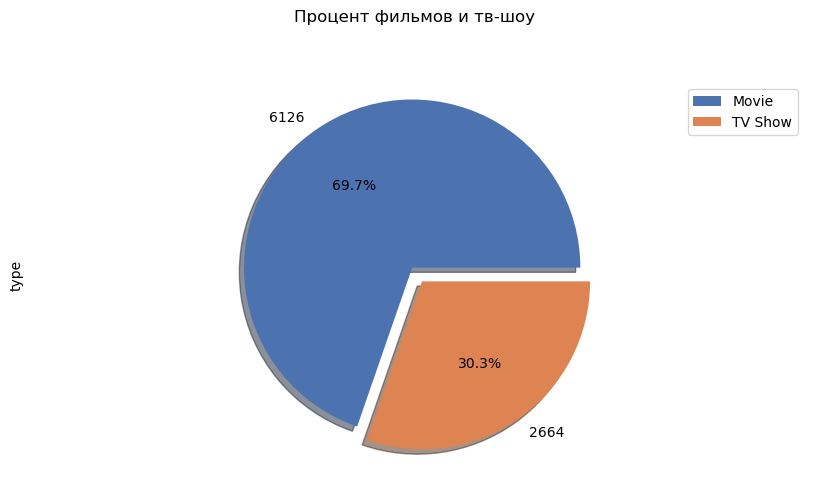

In [137]:
plt.figure(figsize=(10,5))
show_type=df["type"].value_counts()
explode={0,0.1}
ax=show_type.plot(kind="pie", explode=explode ,colors =sns.color_palette('deep') ,autopct="%0.1f%%",labels=show_type,shadow=True);
plt.legend(labels=df["type"]);
plt.axis('equal')
plt.title("Процент фильмов и тв-шоу \n\n\n")
plt.show()

In [138]:
Netflix_columns = df.columns
Netflix_columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# Задача 1 Анализ данных Нетфликса

### Описание данных. Изучение и расшифрование столбцов данных 

In [139]:
# Функция для прохода по столбцам
def learn_columns (column_number):
    for i in Netflix_columns:
        if Netflix_columns[column_number - 1] == i:
            print(i)
            display(df[i])

In [140]:
learn_columns(1)

show_id


0          s1
1          s3
2          s6
3         s14
4          s8
        ...  
8785    s8797
8786    s8798
8787    s8801
8788    s8784
8789    s8786
Name: show_id, Length: 8790, dtype: object

**show_id - Столбец с уникальными номерами фильмов или тв-шоу**

In [141]:
learn_columns(2)

type


0         Movie
1       TV Show
2       TV Show
3         Movie
4         Movie
         ...   
8785    TV Show
8786    TV Show
8787    TV Show
8788    TV Show
8789    TV Show
Name: type, Length: 8790, dtype: object

**type - Столбец с типом продукта (фильм или тв-шоу)**

In [142]:
learn_columns(3)

title


0                   Dick Johnson Is Dead
1                              Ganglands
2                          Midnight Mass
3       Confessions of an Invisible Girl
4                                Sankofa
                      ...               
8785                          Yunus Emre
8786                           Zak Storm
8787                  Zindagi Gulzar Hai
8788                                Yoko
8789                                 YOM
Name: title, Length: 8790, dtype: object

**title - Столбец с названием фильма или тв-шоу**

In [143]:
learn_columns(4)

director


0       Kirsten Johnson
1       Julien Leclercq
2         Mike Flanagan
3         Bruno Garotti
4          Haile Gerima
             ...       
8785          Not Given
8786          Not Given
8787          Not Given
8788          Not Given
8789          Not Given
Name: director, Length: 8790, dtype: object

**director - Столбец с названием режиссера фильма или тв-шоу**

In [144]:
learn_columns(5)

country


0       United States
1              France
2       United States
3              Brazil
4       United States
            ...      
8785           Turkey
8786    United States
8787         Pakistan
8788         Pakistan
8789         Pakistan
Name: country, Length: 8790, dtype: object

**country - Столбец со страной-производителем фильма или тв-шоу**

In [145]:
learn_columns(6)

date_added


0        9/25/2021
1        9/24/2021
2        9/24/2021
3        9/22/2021
4        9/24/2021
           ...    
8785     1/17/2017
8786     9/13/2018
8787    12/15/2016
8788     6/23/2018
8789      6/7/2018
Name: date_added, Length: 8790, dtype: object

**date_added - Столбец с датой добавления на сайт фильма или тв-шоу**

In [146]:
learn_columns(7)

release_year


0       2020
1       2021
2       2021
3       2021
4       1993
        ... 
8785    2016
8786    2016
8787    2012
8788    2016
8789    2016
Name: release_year, Length: 8790, dtype: int64

**release_year - Столбец с годом выхода фильма или тв-шоу**

In [147]:
learn_columns(8)

rating


0       PG-13
1       TV-MA
2       TV-MA
3       TV-PG
4       TV-MA
        ...  
8785    TV-PG
8786    TV-Y7
8787    TV-PG
8788     TV-Y
8789    TV-Y7
Name: rating, Length: 8790, dtype: object

**rating - Столбец с рейтингом фильма или тв-шоу**

In [148]:
learn_columns(9)

duration


0          90 min
1        1 Season
2        1 Season
3          91 min
4         125 min
          ...    
8785    2 Seasons
8786    3 Seasons
8787     1 Season
8788     1 Season
8789     1 Season
Name: duration, Length: 8790, dtype: object

**duration - Столбец с длительностью фильма или тв-шоу**

In [149]:
learn_columns(10)

listed_in


0                                           Documentaries
1       Crime TV Shows, International TV Shows, TV Act...
2                      TV Dramas, TV Horror, TV Mysteries
3                      Children & Family Movies, Comedies
4        Dramas, Independent Movies, International Movies
                              ...                        
8785                    International TV Shows, TV Dramas
8786                                             Kids' TV
8787    International TV Shows, Romantic TV Shows, TV ...
8788                                             Kids' TV
8789                                             Kids' TV
Name: listed_in, Length: 8790, dtype: object

**listed_in - Столбец с жанром(жанрами) фильма или тв-шоу**

### Предобработка данных

In [150]:
df.duplicated().sum()

0

In [151]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [152]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV


In [153]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### Исследовательский анализ данных (EDA)

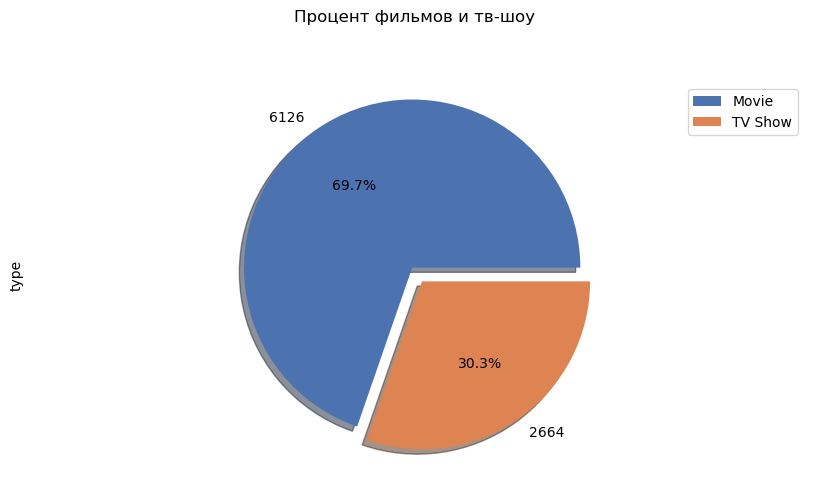

In [154]:
plt.figure(figsize=(10,5))
show_type=df["type"].value_counts()
explode={0,0.1}
ax=show_type.plot(kind="pie", explode=explode ,colors =sns.color_palette('deep') ,autopct="%0.1f%%",labels=show_type,shadow=True);
plt.legend(labels=df["type"]);
plt.axis('equal')
plt.title("Процент фильмов и тв-шоу \n\n\n")
plt.show()

In [155]:
directors = df['director'].value_counts()
directors.head()

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Name: director, dtype: int64

In [156]:
sum_of_given_directors = directors.sum()-directors[0]
print(f"Количество известных режиссеров {sum_of_given_directors}")

Количество известных режиссеров 6202


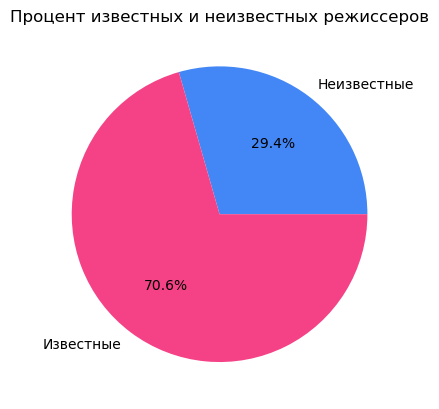

In [157]:
labels = ['Неизвестные', 'Известные']
sizes = [directors[0], sum_of_given_directors]
colors = ['#4287f5', '#f54287']

plt.pie(sizes, labels=labels, colors=colors, autopct='%0.1f%%')
plt.title('Процент известных и неизвестных режиссеров')
plt.show()

In [158]:
colors = px.colors.sequential.Viridis

fig = px.bar(directors[1:11], 
       y=directors[1:11].index,
       x=directors[1:11],
       color=directors[1:11].index,
       color_discrete_sequence=colors,
       text_auto=True,
       labels=dict(y='Режиссеры', x='Количество фильмов или тв-шоу на сайте', color='Режиссеры'),  # Добавляем название для легенды 
       orientation="h")

fig.show()

In [159]:
df['country'].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [160]:
print("Все российские фильмы/тв-шоу на сервисе Нетфликс:")
print(df.loc[df['country'] == 'Russia']['title'].values)

Все российские фильмы/тв-шоу на сервисе Нетфликс:
['Secret Magic Control Agency' 'To the Lake' 'Dovlatov'
 'Gagarin: First in Space' 'Hardcore Henry' 'Kid-E-Cats' 'Larva'
 'Masha and the Bear' 'Better Than Us' 'Sparta' 'The Method' 'Fartsa'
 'Locust' 'Be-Be-Bears' 'JingleKids' 'Silver Spoon' 'The Road to Calvary'
 'Trotsky' 'Yoko and His Friends']


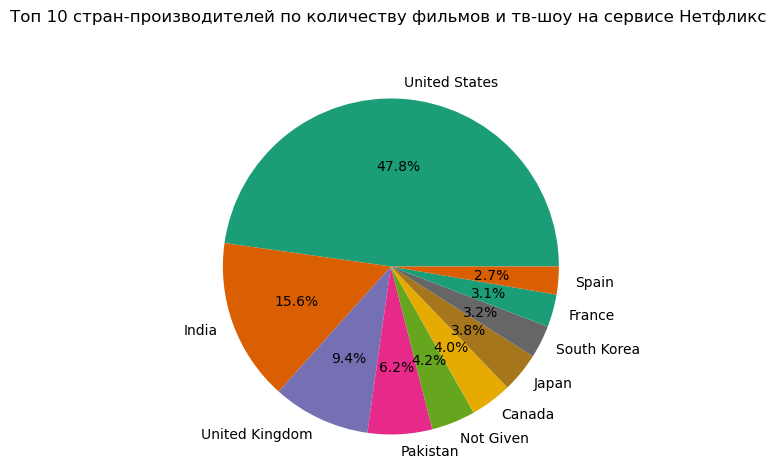

In [161]:
data = df['country'].value_counts().head(10)
labels = data.index
#explode = (0, 0.1)

plt.pie(data, labels=labels, autopct='%0.1f%%', colors=sns.color_palette('Dark2'))
plt.axis('equal')
plt.title("Топ 10 стран-производителей по количеству фильмов и тв-шоу на сервисе Нетфликс \n\n\n")

plt.show()

**Альтернативный график**

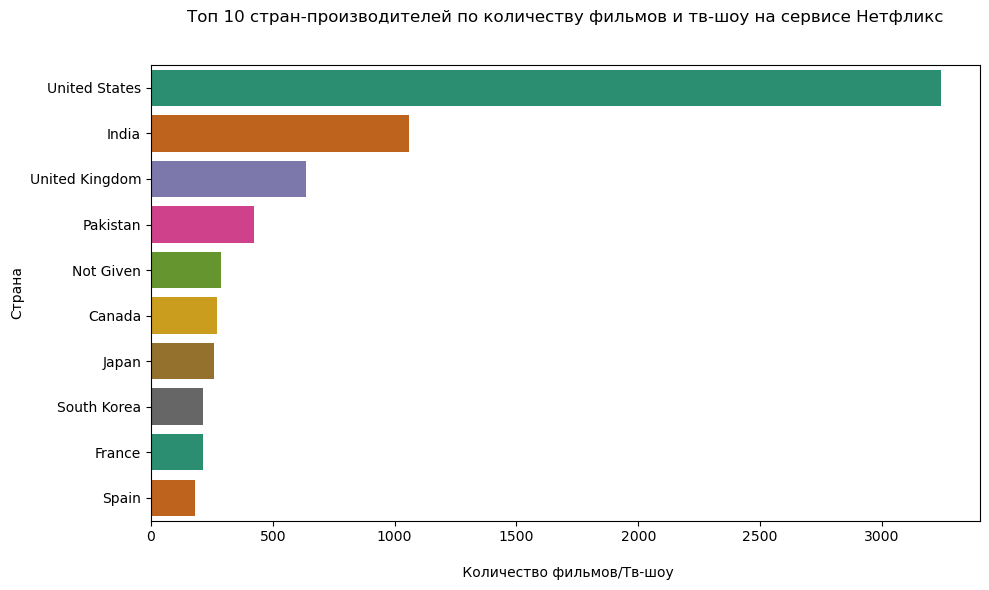

In [162]:
data = df['country'].value_counts().head(10)
labels = data.index

plt.figure(figsize=(10, 6))
sns.barplot(x=data, y=labels, palette='Dark2')

plt.xlabel('\n Количество фильмов/Тв-шоу')
plt.ylabel('Страна')
plt.title("Топ 10 стран-производителей по количеству фильмов и тв-шоу на сервисе Нетфликс\n\n")

plt.tight_layout()
plt.show()

In [163]:
duration = df['duration'].value_counts()
duration

1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: duration, Length: 220, dtype: int64

**Продолжительность сериалов**

In [164]:
seasons_only = df[df['duration'].str.contains('Season')]

In [165]:
sum_of_seasons = seasons_only['duration'].value_counts()
sum_of_seasons

1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
15 Seasons       2
13 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

In [166]:
px.bar(sum_of_seasons,  
       color = sum_of_seasons.index,
       color_discrete_sequence = colors,
       title = 'Продолжительность сериалов',
       text_auto=True,
       orientation= "h",
       labels=dict(index='Сезоны',value='Количество'))

### Построение дашборда

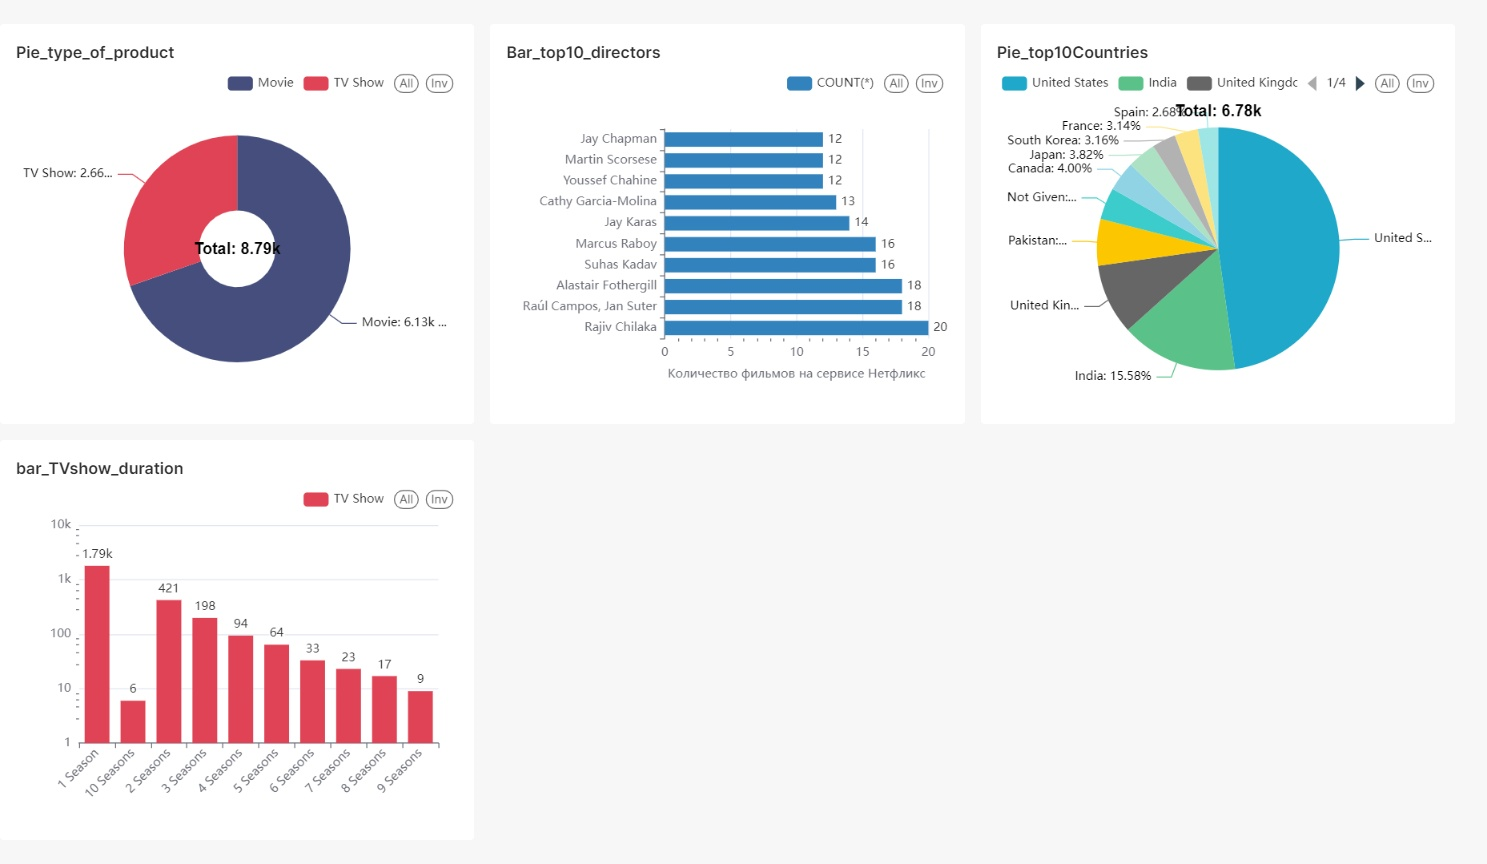

### Общий вывод о проделанной работе

В данной работе были изучены столбцы с данными, что они из себя представляют и что содержат. Проведена проверка на дубликаты, пустые строки, изменен тип столбца "date_added" c object на datetime. Проведен исследовательский анализ данных, построены графики: 
* "Процент фильмов и тв-шоу" в котором мы выяснили, что на сервисе Нетфликс 69.7% фильмов и 30.3% ТВ-шоу.
* "Процент известных и неизвестных режиссеров" в котором мы выяснили, что на сервисе Нетфликс 70.6% известных режиссеров и 29.4% неизвестных режиссеров.
* "Топ 10 режиссеров по количеству фильмов и сериалов" в котором мы выяснили, что на сервисе Нетфликс больше всего фильмов и сериалов у рижессера Rajiv Chilaka.
* "Топ 10 стран-производителей по количеству фильмов и тв-шоу на сервисе Нетфликс" в котором мы выяснили, что США являются производителями почти половины(47.8%) всех фильмов и сериалов на площадке. 

По самым интересным графикам построен дашборд

# Задача 2 Дизайн A/B эксперимента

In [167]:
df = pd.read_csv("C:/Zhivopis/AB_Test_Results.csv")

In [168]:
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [169]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [170]:
df.duplicated().sum()

2067

Если один и тот же человек купит товар на одну и ту же сумму несколько раз, то в датафрейме он будет помечен как дубликат, но это не ошибка.

### Визуализация данных

In [171]:
df['REVENUE'].value_counts().get(0)

9848

In [172]:
df['REVENUE'].value_counts().sum()

10000

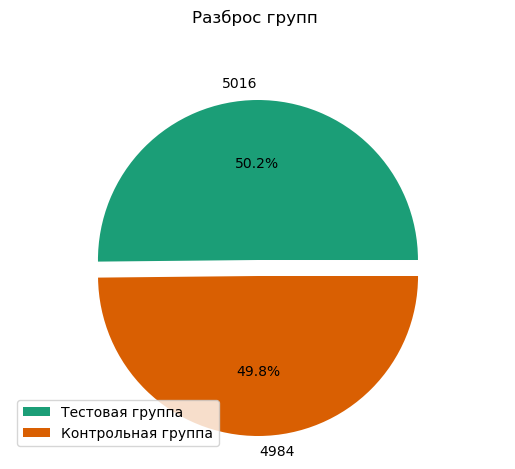

In [173]:
data = df["VARIANT_NAME"].value_counts()
labels = df["VARIANT_NAME"].value_counts()
explode = (0, 0.1)

plt.pie(data, labels = labels, autopct = '%0.1f%%', explode = explode, colors = sns.color_palette('Dark2'))
plt.axis('equal')  
plt.legend(labels = ['Тестовая группа', 'Контрольная группа']);
plt.title("Разброс групп \n\n\n")

plt.show()

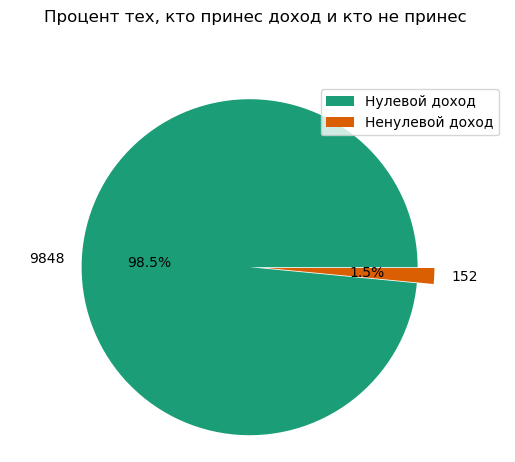

In [174]:
data = [df['REVENUE'].value_counts().get(0), df['REVENUE'].value_counts().sum() - df['REVENUE'].value_counts().get(0)]
labels = [df['REVENUE'].value_counts().get(0), df['REVENUE'].value_counts().sum() - df['REVENUE'].value_counts().get(0)]
explode = (0, 0.1)

plt.pie(data, labels = labels, autopct = '%0.1f%%', explode = explode, colors = sns.color_palette('Dark2'))
plt.axis('equal')  
plt.legend(labels = ['Нулевой доход', 'Ненулевой доход']);
plt.title("Процент тех, кто принес доход и кто не принес \n\n\n")

plt.show()

Создаем новый столбец retention

In [175]:
df['conversion'] = df['REVENUE'].apply(lambda x: 1 if x > 0 else 0)

In [176]:
df.sample(5)

,USER_ID,VARIANT_NAME,REVENUE,conversion
2640,8260,control,0.0,0
3989,940,variant,0.0,0
6683,6327,control,0.0,0
2433,4682,variant,0.0,0
9044,77,variant,0.0,0


### t-test

In [177]:
def ttest (a, b, name1, name2):
    alpha = 0.05
    t_stat, p_value = ttest_ind(a, b)
    print(f'Значение p-значения между группами {name1} и {name2}:{p_value: .15f}')
    if p_value > alpha:
        print(f'Статистически значимых различий между группами {name1} и {name2} не обнаружено\n')
    else:
        print(f'Обнаружены статистически значимые различия между группами {name1} и {name2}\n')

In [178]:
# Разделение данных на две группы
variant_data = df[df['VARIANT_NAME'] == 'variant']['conversion']
control_data = df[df['VARIANT_NAME'] == 'control']['conversion']

In [179]:
ttest(variant_data, control_data, "variant", "control")

Значение p-значения между группами variant и control: 0.487961391467320
Статистически значимых различий между группами variant и control не обнаружено



### Хи-квадрат

In [180]:
df.head(5)

,USER_ID,VARIANT_NAME,REVENUE,conversion
0,737,variant,0.0,0
1,2423,control,0.0,0
2,9411,control,0.0,0
3,7311,control,0.0,0
4,6174,variant,0.0,0


In [181]:
contingency_table = pd.crosstab(df['VARIANT_NAME'], df['conversion'])
contingency_table

conversion,0,1
VARIANT_NAME,,
control,4904,80
variant,4944,72


In [182]:
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("\nРезультаты теста Хи-квадрат:")
print(f"Статистика Хи-квадрат = {chi2}")
print(f"p-значение = {p_value}")


Результаты теста Хи-квадрат:
Статистика Хи-квадрат = 0.37441985868631433
p-значение = 0.5406048684924643


Статистика Хи-квадрат оказалась маленькой и p-значение большим, это указывает на то, что нет статистически значимой связи между переменными

### Бутстрап анализ

In [183]:
# Определяем функцию для расчета средних значений bootstrap
def bootstrap_means(data, n_bootstrap_samples=10000):
    bootstrap_sample_means = []
    for _ in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(bootstrap_sample.mean())
    return bootstrap_sample_means

# Рассчитываем средние значения bootstrap для каждой группы
bootstrap_means_A = bootstrap_means(df[df['VARIANT_NAME'] == 'variant']['conversion'])
bootstrap_means_B = bootstrap_means(df[df['VARIANT_NAME'] == 'control']['conversion'])


In [184]:
display(bootstrap_means_A[:10])

[0.01036682615629984,
 0.017344497607655503,
 0.01335725677830941,
 0.013157894736842105,
 0.014952153110047847,
 0.014752791068580542,
 0.01375598086124402,
 0.01814194577352472,
 0.01674641148325359,
 0.015749601275917065]

In [185]:
display(bootstrap_means_B[:10])

[0.018659711075441412,
 0.016653290529695025,
 0.01765650080256822,
 0.016452648475120384,
 0.013643659711075442,
 0.01544943820224719,
 0.016653290529695025,
 0.016051364365971106,
 0.01906099518459069,
 0.018057784911717497]

### Конверсия групп

In [186]:
conversion = df.groupby('VARIANT_NAME')['conversion'].mean()
conversion

VARIANT_NAME
control    0.016051
variant    0.014354
Name: conversion, dtype: float64

Конверсия контрольной группы больше, что позволяет полагать, что добавление интерактивности и мелких деталей на сайт не пошло на пользу.

### Анализ доверительного интервала

In [187]:
confidence_level = 0.95

In [188]:
data_group1 = variant_data
data_group2 = control_data

In [189]:
#значение успеха (доля единиц в выборке)
proportion_success_group1 = data_group1.sum() / data_group1.size

#стандартное отклонение
standart_error_group1 = np.std(data_group1, ddof = 1) / np.sqrt(len(data_group1))

# половина ширины доверительного интервала
# stats.t.ppf - функция которая возвращает число для определения, является ли различие между двумя выборками статистически значимым
margin_of_error_group1 = standart_error_group1 * np.abs(stats.t.ppf((1 - confidence_level) / 2, len(data_group1) - 1))

#нижние границы доверительного интервала
lower_bound_group1 = proportion_success_group1 - margin_of_error_group1

#верхние границы доверительного интервала
upper_bound_group1 = proportion_success_group1 + margin_of_error_group1


proportion_success_group2 = data_group2.sum() / data_group2.size
standart_error_group2 = np.std(data_group2, ddof = 1) / np.sqrt(len(data_group2))
margin_of_error_group2 = standart_error_group2 * np.abs(stats.t.ppf((1 - confidence_level) / 2, len(data_group2) - 1))

lower_bound_group2 = proportion_success_group2 - margin_of_error_group2
upper_bound_group2 = proportion_success_group2 + margin_of_error_group2

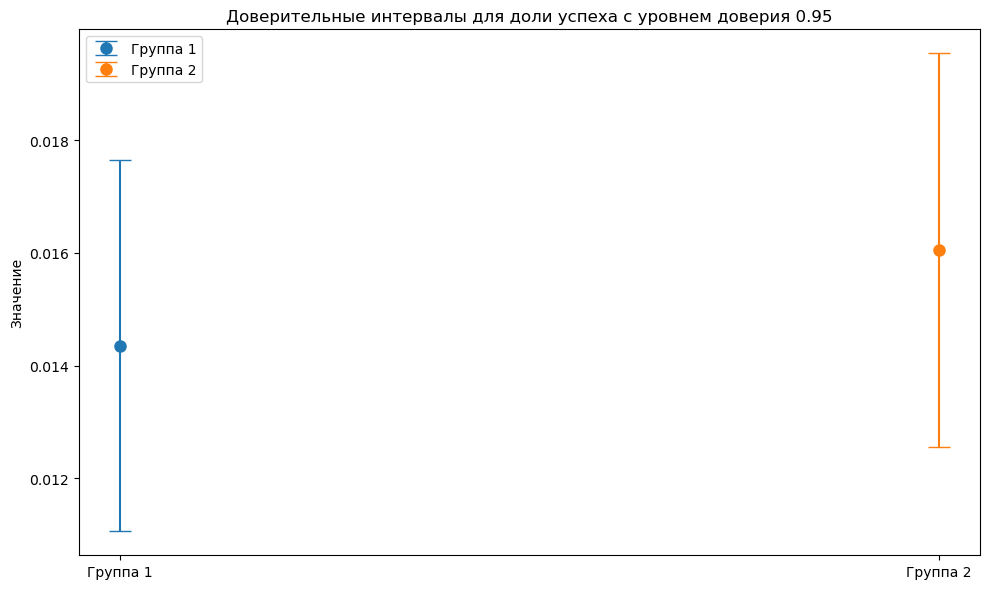

In [190]:
plt.figure(figsize = (10, 6))
plt.errorbar(1, proportion_success_group1, yerr = margin_of_error_group1, fmt = 'o', markersize = 8, capsize = 8, label = 'Группа 1')
plt.errorbar(2, proportion_success_group2, yerr = margin_of_error_group2, fmt = 'o', markersize = 8, capsize = 8, label = 'Группа 2')
plt.xticks([1,2], ['Группа 1', 'Группа 2'])
plt.ylabel('Значение')
plt.title(f'Доверительные интервалы для доли успеха с уровнем доверия {confidence_level}')
plt.legend()
plt.tight_layout()
plt.show()


In [191]:
print(f'Группа 1: Доверительный анализ для доли успеха [{lower_bound_group1: .3f}, {upper_bound_group1: .3f}], Доля успеха: {proportion_success_group1: .3f} ')
print(f'Группа 2: Доверительный анализ для доли успеха [{lower_bound_group2: .3f}, {upper_bound_group2: .3f}], Доля успеха: {proportion_success_group2: .3f} ')

Группа 1: Доверительный анализ для доли успеха [ 0.011,  0.018], Доля успеха:  0.014 
Группа 2: Доверительный анализ для доли успеха [ 0.013,  0.020], Доля успеха:  0.016 


In [192]:
print(f'В данном случае, с{confidence_level*100: .0f}% вероятностью настоящее значение доли успеха будет лежать в пределах указанного интервала')

В данном случае, с 95% вероятностью настоящее значение доли успеха будет лежать в пределах указанного интервала


### Вывод по итогу эксперимента
* **t-test** показал нам, что статистически значимых различий между группами variant и control не обнаружено
*
* **Хи-квадрат** показал нам, что статистика Хи-квадрат оказалась маленькой и p-значение большим, это указывает на то, что нет статистически значимой связи между переменными
*
* **Бутстрап** анализ показал нам, различия в средних коэффициентах конверсии между двумя группами незначительно
*
* **Конверсия** контрольной группы больше, что позволяет полагать, что добавление интерактивности и мелких деталей на сайт не пошло на пользу.
*
* **Анализ доверительного интервала** - В данном случае, с 95% вероятностью настоящее значение доли успеха будет лежать в пределах указанного интервала(для группы variant [ 0.011,  0.018], для группы control [ 0.013,  0.020]

Изменения на сайте не повлияет на рост conversion. Группы variant и control на самом деле не отличаются, и наблюдаемые различия случайны.